<a href="https://colab.research.google.com/github/aseelalzaben03/aseelalzaben03-Arabic-Fake-news-detection-using-ARAB-BERT/blob/main/TEXT_DATASET_preperaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About First Dataset


The dataset used in this project was scrapped from popular arabic news websites like:

-Misbar (https://misbar.com/)

-No Rumors (http://norumors.net/)

-Verify-Sy (https://verify-sy.com/)

-Fatabyyano (https://fatabyyano.net/)

It's a collection of Arabic news articles labeled as fake or real.

It contains two key columns:
'Article_content'
'Label'
. The 'Label' column represents 2 different validity classes:real and fake.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## Loading dataset

In [ ]:
data=pd.read_csv('/content/fake_news_textdata.csv')
data.head()

,Label,Topic,Article_content
0,real,politics,القدس المحتلة- لن يتمكن المقدسي سامي درويش في ...
1,real,politics,طهران- منذ الهجوم الإسرائيلي على القنصلية الإي...
2,real,politics,غادر المحامي الفلسطيني راجي صوراني قطاع غزة رف...
3,real,politics,نابلس- لليوم الثاني على التوالي، تتعرض قرية دو...
4,real,politics,بريتوريا- تقدمت اللجنة المستقلة للانتخابات في ...


# Dataset Exploration

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46097 entries, 0 to 46096
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Label            46097 non-null  object
 1   Topic            46097 non-null  object
 2   Article_content  46097 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [ ]:
data.isnull().sum()



,0
Label,0
Topic,0
Article_content,0


In [ ]:
data.shape

(46097, 3)

In [ ]:
data.columns

Index(['Label', 'Topic', 'Article_content'], dtype='object')

In [ ]:
data.describe()


,Label,Topic,Article_content
count,46097,46097,46097
unique,2,38,8874
top,fake,رياضة,[]
freq,42243,16984,150


In [ ]:
data[ 'Topic'].value_counts()

,count
Topic,
رياضة,16984
سياسة,7410
ثقافة وفن,5841
صحة,3458
أخبار,3156
Politics,1826
Sport,1213
Tech,1137
Science and Technology,800


In [ ]:
# Mapping to unify topic names
topic_mapping = {
    # Sports
    'رياضة': 'Sports', 'Sport': 'Sports', 'sport': 'Sports', 'Sports': 'Sports',

    # Politics
    'سياسة': 'Politics', 'Politics': 'Politics', 'politics': 'Politics',

    # Culture & Entertainment
    'ثقافة وفن': 'Culture & Entertainment', 'culture': 'Culture & Entertainment',
    'Culture': 'Culture & Entertainment', 'arts': 'Culture & Entertainment',
    'موسيقى': 'Culture & Entertainment', 'entertainment': 'Culture & Entertainment',
    'ترفيه': 'Culture & Entertainment',

    # Health
    'صحة': 'Health', 'health': 'Health', 'Medical': 'Health',

    # News
    'أخبار': 'News', 'news': 'News', 'Social': 'News', 'middle-east': 'News',
    'opinion': 'News', 'midan': 'News', 'family': 'News', 'lifestyle': 'News',
    'turath': 'News',

    # Science & Technology
    'Tech': 'Science & Technology', 'tech': 'Science & Technology',
    'Technology': 'Science & Technology', 'تكنولوجيا': 'Science & Technology',
    'Science and Technology': 'Science & Technology', 'Science': 'Science & Technology',
    'science': 'Science & Technology',

    # Economy & Business
    'Economic': 'Economy & Business', 'Economy': 'Economy & Business',
    'Finance': 'Economy & Business', 'business': 'Economy & Business',

    # Religion
    'Religion': 'Religion'
}

# Apply the mapping on the original DataFrame column
data['Topic'] = data['Topic'].replace(topic_mapping)


In [ ]:
data['Topic'].value_counts()

,count
Topic,
Sports,18683
Politics,9304
Culture & Entertainment,6587
News,4180
Health,3568
Science & Technology,2584
Economy & Business,1155
Religion,36


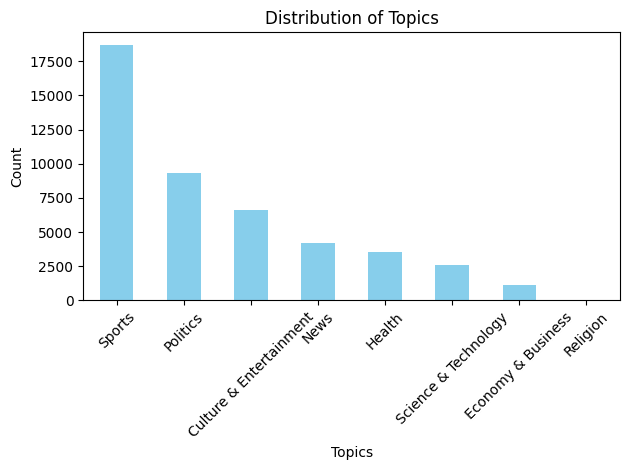

In [ ]:
import matplotlib.pyplot as plt

# Count the number of occurrences for each topic after applying the mapping
topic_counts = data['Topic'].value_counts()

# Plot a bar chart to visualize the distribution of topics
topic_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Topics')
plt.xlabel('Topics')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
data['Label'].value_counts()

,count
Label,
fake,42243
real,3854


Clearly impalance data !!



In [ ]:
data[['Article_content', 'Label']]

,Article_content,Label
0,القدس المحتلة- لن يتمكن المقدسي سامي درويش في ...,real
1,طهران- منذ الهجوم الإسرائيلي على القنصلية الإي...,real
2,غادر المحامي الفلسطيني راجي صوراني قطاع غزة رف...,real
3,نابلس- لليوم الثاني على التوالي، تتعرض قرية دو...,real
4,بريتوريا- تقدمت اللجنة المستقلة للانتخابات في ...,real
...,...,...
46092,لم يعزف أندريه ريو موسيقى فيلم الرسالة,fake
46093,لم يعزف ياني موسيقى رأفت الهجَّان,fake
46094,وفاة الفنانة فيروز.. خبر زائف,fake
46095,مايكل جاكسون يغني للحج.. حقيقة الفيديو,fake


In [ ]:
# Rename the 'Label' column to 'is_fake'
data = data.rename(columns={'Label': 'is_fake'})

#  Replace values - 'real' becomes 0, 'fake' becomes 1
data['is_fake'] = data['is_fake'].replace({'real': 0, 'fake': 1})

data['is_fake']

<ipython-input-14-f6ccc35e8e33>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_fake'] = data['is_fake'].replace({'real': 0, 'fake': 1})


,is_fake
0,0
1,0
2,0
3,0
4,0
...,...
46092,1
46093,1
46094,1
46095,1


In [ ]:
data['news']= data['Article_content']

In [ ]:
data=data[['is_fake', 'news']]
data

,is_fake,news
0,0,القدس المحتلة- لن يتمكن المقدسي سامي درويش في ...
1,0,طهران- منذ الهجوم الإسرائيلي على القنصلية الإي...
2,0,غادر المحامي الفلسطيني راجي صوراني قطاع غزة رف...
3,0,نابلس- لليوم الثاني على التوالي، تتعرض قرية دو...
4,0,بريتوريا- تقدمت اللجنة المستقلة للانتخابات في ...
...,...,...
46092,1,لم يعزف أندريه ريو موسيقى فيلم الرسالة
46093,1,لم يعزف ياني موسيقى رأفت الهجَّان
46094,1,وفاة الفنانة فيروز.. خبر زائف
46095,1,مايكل جاكسون يغني للحج.. حقيقة الفيديو


## About The Second Dataset

This data-set contains 5870 news articles in Arabic language extraced from aljazeera.net website. Each item contains the following information :

guid

published

title

description

link

content

image

ref

tags

## Loading dataset

In [ ]:
data2=pd.read_csv('/content/article_aljazeera.csv')
data2.head()

,guid,published,title,description,link,content,image,ref,tags
0,e9e8f065-b6ed-498b-ac97-a5aa7b1567b2,"Fri, 27 Dec 2019 19:06:08 GMT",الجيش التركي يعلن جاهزيته للعبور إلى ليبيا.. ا...,تجددت المعارك اليوم الجمعة بمحيط العاصمة الليب...,https://www.aljazeera.net/news/politics/2019/1...,تجددت المعارك اليوم الجمعة بمحيط العاصمة الليب...,https://www.aljazeera.net/File/GetImageCustom/...,المصدر : الجزيرة + وكالات\n\n,#معارك_طرابلس #الجيش_التركي #قوات_حفتر #حكومة_...
1,01f30c7b-41e1-4579-824b-4bf6a1902328,"Fri, 27 Dec 2019 22:17:41 GMT","محمد علي يعلن وثيقة ""التوافق المصري"" تمهيدا لإ...",كشف الفنان والمقاول المصري المعارض محمد علي عن...,https://www.aljazeera.net/news/politics/2019/1...,عبد الرحمن محمد-الجزيرة نت كشف الفنان والمقاول...,https://www.aljazeera.net/File/GetImageCustom/...,المصدر : الجزيرة\n\n,#مصر #محمد_علي #وثيقة #التوافق_المصري #إسقاط_ا...
2,7d8a27c5-c79d-421a-bb69-7faa9467c9ff,"Fri, 27 Dec 2019 16:52:54 GMT",من الحلم إلى الشارع.. قصة مشروع السيارة التركية,شهدت تركيا اليوم الجمعة الإعلان رسميا عن ميلاد...,https://www.aljazeera.net/news/ebusiness/2019/...,خليل مبروك-إسطنبول شهدت تركيا اليوم الجمعة الإ...,https://www.aljazeera.net/Views/Shared/shared/...,المصدر : الجزيرة\n\n,#تركيا #سيارة #السيارة_التركية #الأناضول #أردوغان
3,997e55db-ee98-4640-a851-7c2e8cdd4dae,"Fri, 27 Dec 2019 14:54:25 GMT",حكومة الهند تصعّد ضد المسلمين.. طوارئ بنيودلهي...,عززت السلطات الهندية اليوم الجمعة إجراءات الأم...,https://www.aljazeera.net/news/politics/2019/1...,عززت السلطات الهندية اليوم الجمعة إجراءات الأم...,https://www.aljazeera.net/File/GetImageCustom/...,المصدر : وكالات\n\n,#حكومة_الهند #قانون_الجنسية #المسلمين #غضب #ال...
4,0f033d6e-ce50-48e9-9c97-2f01bac3430e,"Fri, 27 Dec 2019 16:29:52 GMT",مظاهرات بأربع دول إسلامية ضد انتهاكات الصين بح...,احتشد آلاف المسلمين في عدد من الدول الإسلامية ...,https://www.aljazeera.net/news/politics/2019/1...,احتشد آلاف المسلمين في عدد من الدول الإسلامية ...,https://www.aljazeera.net/Views/Shared/shared/...,المصدر : الجزيرة + وكالات\n\n,#الصين #الإيغور #مظاهرات #ماليزيا #إندونيسيا #...


In [ ]:
data2.columns

Index(['guid', 'published', 'title', 'description', 'link', 'content', 'image',
       'ref', 'tags'],
      dtype='object')

In [ ]:
data2.shape

(5870, 9)

In [ ]:
# Keep only the 'content' column and drop all others
data2 = data2[['content']]


# Add a new column 'is_fake' with value 0 for all rows
data2['is_fake'] = 0

# Display the first few rows to verify
print(data2.head())

                                             content  is_fake
0  تجددت المعارك اليوم الجمعة بمحيط العاصمة الليب...        0
1  عبد الرحمن محمد-الجزيرة نت كشف الفنان والمقاول...        0
2  خليل مبروك-إسطنبول شهدت تركيا اليوم الجمعة الإ...        0
3  عززت السلطات الهندية اليوم الجمعة إجراءات الأم...        0
4  احتشد آلاف المسلمين في عدد من الدول الإسلامية ...        0


<ipython-input-20-b7b2bf88cd1b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['is_fake'] = 0


In [ ]:
data2 = data2.rename(columns={'content': 'news'})
data2

,news,is_fake
0,تجددت المعارك اليوم الجمعة بمحيط العاصمة الليب...,0
1,عبد الرحمن محمد-الجزيرة نت كشف الفنان والمقاول...,0
2,خليل مبروك-إسطنبول شهدت تركيا اليوم الجمعة الإ...,0
3,عززت السلطات الهندية اليوم الجمعة إجراءات الأم...,0
4,احتشد آلاف المسلمين في عدد من الدول الإسلامية ...,0
...,...,...
5865,نقلت وكالة بلومبيرغ الإخبارية عن مسؤولين أميرك...,0
5866,الجزيرة.نت رأينا خلال الشهرين الماضيين العديد ...,0
5867,دعا عبد الملك المخلافي مستشار الرئيس اليمني عب...,0
5868,ربطت إسرائيل اليوم الأربعاء أي مساعدة قد تقدمه...,0


In [ ]:

data3=pd.read_csv('https://huggingface.co/datasets/sanaa-11/fake-real-arabic-news/resolve/main/real-moroccan-news.csv')
data3

,label,Content
0,real,أفادت المندوبية السامية للتخطيط بأن 69 في الما...
1,real,أعلنت الخدمة الوطنية للصحة وجودة الأغذية الفلا...
2,real,سجالاتٌ واضحة انطلقت بين باحثين في الشأن الاقت...
3,real,أفادت المندوبية السامية للتخطيط بأن 48 في الما...
4,real,تستمر “تجارة القرب” في هيمنتها على “النسيج الت...
...,...,...
1131,real,فسخ اتحاد طنجة، تعاقده مع حارس مرماه بدر الدين...
1132,real,حطت بعثة نادي الرجاء الرياضي لكرة القدم، مساء ...
1133,real,كشف طبيب فريق الأهلي المصري، أحمد جاب الله، أن...
1134,real,واصل الدولي المغربي يوسف النصيري هوايته المفضل...


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    1136 non-null   object
 1   Content  1136 non-null   object
dtypes: object(2)
memory usage: 17.9+ KB


In [ ]:
data3.isnull().sum()

,0
label,0
Content,0


In [ ]:
data3.shape

(1136, 2)

In [ ]:
data3['label'].value_counts()

,count
label,
real,1136


In [ ]:
# Create a copy to avoid modifying the original data
result = data3.copy()

# Rename 'content' column to 'news'
result = result.rename(columns={'Content': 'news'})

# Rename 'label' column to 'is_fake'
result = result.rename(columns={'label': 'is_fake'})

# Fill all values in 'is_fake' column with 0
result['is_fake'] = 0

# Display the first few rows to verify changes
print(result.head())

   is_fake                                               news
0        0  أفادت المندوبية السامية للتخطيط بأن 69 في الما...
1        0  أعلنت الخدمة الوطنية للصحة وجودة الأغذية الفلا...
2        0  سجالاتٌ واضحة انطلقت بين باحثين في الشأن الاقت...
3        0  أفادت المندوبية السامية للتخطيط بأن 48 في الما...
4        0  تستمر “تجارة القرب” في هيمنتها على “النسيج الت...


In [ ]:
# Concatenate data2 and data
new_data = pd.concat([data, data2, result], ignore_index=True)

# Display the first few rows to verify
new_data.head()



,is_fake,news
0,0,القدس المحتلة- لن يتمكن المقدسي سامي درويش في ...
1,0,طهران- منذ الهجوم الإسرائيلي على القنصلية الإي...
2,0,غادر المحامي الفلسطيني راجي صوراني قطاع غزة رف...
3,0,نابلس- لليوم الثاني على التوالي، تتعرض قرية دو...
4,0,بريتوريا- تقدمت اللجنة المستقلة للانتخابات في ...


In [ ]:
new_data.shape

(15843, 2)

In [ ]:
new_data['is_fake'].value_counts()

,count
is_fake,
0,9784
1,6059


Impalance Dataset

In [ ]:
# Drop duplicates
new_data = new_data.drop_duplicates()

In [ ]:
new_data.shape

(15843, 2)

In [ ]:
new_data['is_fake'].value_counts()

,count
is_fake,
0,9784
1,6059


In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_minority= new_data[new_data['is_fake'] == 1]
df_majority = new_data[new_data['is_fake'] == 0]

# Calculate number of samples to downsample to
n_samples = len(df_minority)

# Downsample majority class
df_majority_downsampled = resample(
    df_majority,
    replace=False,          # without replacement
    n_samples=n_samples,
    random_state=42
)

# Combine and shuffle
balanced_data = pd.concat([df_majority_downsampled, df_minority])
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the balance
print(balanced_data['is_fake'].value_counts())


is_fake
1    6059
0    6059
Name: count, dtype: int64


In [ ]:
balanced_data.shape

(12118, 2)

In [ ]:
balanced_data


,is_fake,news
0,1,['الإدعاء\nخلال ظهورها مؤخرًا زعمت الفنانة سما...
1,0,تم اكتشاف فطر كانديدا أوريس المقاوم للأدوية من...
2,1,\n\nتداول مستخدمون على مواقع التواصل الاجتماعي...
3,1,['الإدعاء\nصورة منتشرة بشكل كبير جدا علي أنها ...
4,0,الغضب النقابي على مشروع قانون الإضراب فتصاعد. ...
...,...,...
12113,1,لم تطلق الصحة العالمية اسم متحوّر إكس على متحو...
12114,0,قالت صحيفة بيزنس إنسايدر إن عددا من المشاهير و...
12115,0,أعلنت خلية الأزمة الوزارية في العراق تمديد حظر...
12116,0,تناول موقع ميدل إيست آي البريطاني الأحداث الجا...


In [ ]:
balanced_data.to_excel('balanced_data_correct.xlsx')